# MENINAS NA ENGENHARIA

### *Beatriz Alexandre e Manuela Castilla*

## Objetivo do trabalho

Para o nosso trabalho, decidimos pesquisar e estudar sobre meninas na engenharia, nos questionando o porque há tão poucas.. Para isso, não havia um dataset já pronto. Assim, fizemos formulários para meninas na engenharia, tanto no INSPER quanto para outras faculdades, como também meninas que fazem os demais cursos no INSPER (administração e economia).

Assim, obtemos suficiente respostas para podermos criar e analisar um dataset, conseguindo então criar um classificador, que, a partir das respostas ao formulário, nos diria se a menina tende a fazer engenharia ou não.

Diante disso, fizemos uma pesquisa na qual o fim responderia se diante das características de uma menina que entrasse no INSPER determinaria se esta faria Engenharia ou não. 

Para isso, organizamos os dados e analisamos estes.

## Pegando os dados: meninas na engenharia

In [1]:
# primeiro importamos tudo que seria necessário para o nosso projeto

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI
from scipy.stats import norm, probplot, t
import statsmodels.api as sm
from pandas.core import datetools
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Primeiramente, lemos os excels e organizamos estes:

Lendo a primeira página do excel cuja é da engenharia do INSPER:

In [3]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

In [4]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?', "Se SIM na pergunta anterior, quais familiares?":'Quais familiares?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se SIM na pergunta anterior,  quais familiares?'] = eng_insper['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [5]:
eng_insper['Fez Insper?']='Sim'


In [6]:
eng_insper_idx=eng_insper.set_index('NOME')

lendo o segundo datasheet de todas as faculdades:

In [7]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)

In [8]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Se SIM na pergunta anterior, quais familiares?':'Quais familiares?'})


eng_geral['Se SIM na pergunta anterior,  quais familiares?'] = eng_geral['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [9]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [10]:
eng_geral['Fez Insper?']='Não'

In [11]:
eng_geral_idx=eng_geral.set_index('NOME')

Ao baixar os datasheets, juntamos estes:

In [12]:
len(pd.concat([eng_insper_idx, eng_geral_idx]))

120

In [13]:
eng = pd.concat([eng_insper_idx, eng_geral_idx])
eng.head(2)

,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se SIM na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
NOME,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Osasco SP,Escola Privada,Coc Sapiens,0,Ninguém,1,Gosta de Exatas,1,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",1,R$ 15000 - R$ 20000,Entre 62 a 65 anos,0,Sim
manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,São Paulo SP,Escola Privada,Escola da vila,1,Pai e tio,0,"Gosta de Exatas, Desde de criança brinca com e...",1,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",0,R$ 5000 - R$ 10000,Entre 62 a 65 anos,1,Sim


Para poder fazer nossa análise, fora precisa, simplificar as respostas, para consgeuir fazer a análise sem algum erro

In [14]:
sp = len(eng[eng['ESTADO/CID'].str.contains('SP|Sp', case=False)])
sc = len(eng[eng['ESTADO/CID'].str.contains('SC', case=False)])
mg =len(eng[eng['ESTADO/CID'].str.contains('MG', case=False)])
to = len(eng[eng['ESTADO/CID'].str.contains('TO', case=False)])
ba = len(eng[eng['ESTADO/CID'].str.contains('BA', case=False)])
rj = len(eng[eng['ESTADO/CID'].str.contains('RJ', case=False)])
pr = len(eng[eng['ESTADO/CID'].str.contains('PR', case=False)])
ms = len(eng[eng['ESTADO/CID'].str.contains('MS', case=False)])
es = len(eng[eng['ESTADO/CID'].str.contains('ES', case=False)])
go = len(eng[eng['ESTADO/CID'].str.contains('GO', case=False)])

In [15]:
torta_es = []
torta_es.append(sp)
torta_es.append(sc)
torta_es.append(mg)
torta_es.append(to)
torta_es.append(ba)
torta_es.append(rj)
torta_es.append(pr)
torta_es.append(ms)
torta_es.append(es)
torta_es.append(go)

nomes_es =[]
nomes_es.append("SP")
nomes_es.append("SC")
nomes_es.append("MG")
nomes_es.append("TO")
nomes_es.append("BA")
nomes_es.append("RJ")
nomes_es.append("PR")
nomes_es.append("MS")
nomes_es.append("ES")
nomes_es.append("GO")

tortas_es = pd.DataFrame()
tortas_es["quem"]= nomes_es
tortas_es["estado"] = torta_es

tortas_es.idx = tortas_es.set_index("quem")
tortas_es.idx

print(tortas_es)

  quem  estado
0   SP     104
1   SC       3
2   MG       6
3   TO       5
4   BA       9
5   RJ       2
6   PR       2
7   MS       1
8   ES       3
9   GO       2


/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [16]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split(" e")
    
    for k in split_e:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == " mãe " or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã " or k ==" meu irmão" or k ==" irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k ==" tio." or k ==" tios" or k =="Tios" or k ==" tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower() or k==" avô":
            avos+=1
            avosL.append("avos")
        elif k ==" primos" or k =='Primo' or k==' primas' or k==" primo" or k==' primos ' or k=="Dois primos":
            primos +=1
            primosL.append("primos")
    


## Colentando os dados: meninas do insper

#### lendo o excel das meninas de engenharia do INSPER

In [17]:
# leitura do excel 
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)


In [18]:
#renomeando colunas:
eng_insper_2 = eng_insper_2.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM",  'Algum familiar trabalha na área de engenharia?':'Familiar na área?',  'Se SIM na pergunta anterior,  quais familiares?':'Quais familiares?', 'Engenharia foi sua 1a escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Engenharia?':'Por que escolheu este curso?'})

#limpeza e modificações
semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre

eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Faz Engenharia?']= '1'

eng_insper_2['Quais familiares?'] = eng_insper_2['Quais familiares?'].fillna('Ninguém')


In [19]:
eng_insper_2_idx=eng_insper_2.set_index('NOME')

#### Lendo o excel das meninas do INSPER

In [20]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

In [21]:
insper = insper.drop('Qual é a distância da sua casa para a faculdade', 1)

In [22]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?', 'Se SIM na pergunta anterior, quais familiares?':'Quais familiares?', 'Adm e/ou Econo foi sua primeira escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Administração/ Economia?': 'Por que escolheu este curso?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre

In [23]:
insper_idx=insper.set_index('NOME')

In [24]:
insper_idx['Faz Engenharia?']='0'
#insper_idx

#### Juntando os dataframes

In [25]:
Insper=pd.concat([eng_insper_2, insper_idx])
Insper.head(1)

,Algum familiar na engenharia?,Com quantos anos você espera se aposentar?,Como descobriu o Insper?,Curso,ESTADO/CID,Familiar na área?,Faz Engenharia?,IDADE,Insper foi sua 1a opcao?,NOME,...,Quais familiares?,Quanto você espera ganhar no seu início de sua carreira?,SEMESTRE,"Se ""Não"", qual?","Se SIM na pergunta anterior, quais Familiares?",Seu curso foi sua 1a escolha?,TIPO_EM,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Ter poucas meninas no Insper te desmotiva a ingressar na instituição?,Você pretende ter filhos?
0,NaN,Entre 62 a 65 anos,Por amigos,Engenharia Mecatrônica,Osasco SP,0,1,Entre 19 a 21 anos,1,Vitória de Almeida Oliveira,...,Ninguém,R$ 15000 - R$ 20000,2,Insper,NaN,1,Escola Privada,1.0,NaN,0


In [26]:
pai = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('Pai', case=False)])
tio = len((eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('tios', case=False)]))
mae = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('mãe|mae', case=False)])
irmaos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('irmã|irmão|irma|irmao', case=False)])
padrasto = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('padrasto', case=False)])
ninguem = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('ninguém', case=False)])
avos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('avô|avo', case=False)])
primos = len(eng[eng['Se SIM na pergunta anterior,  quais familiares?'].str.contains('primos|prima|primo', case=False)])
soma = primos+ avos+ ninguem + padrasto+ irmaos+ mae+ tio+pai

In [27]:
pie = []
pie.append(mae)
pie.append(pai)
pie.append(tio)
pie.append(irmaos)
pie.append(padrasto)
pie.append(ninguem)
pie.append(avos)
pie.append(primos)

nomes =[]
nomes.append("mae")
nomes.append("pai")
nomes.append("tio")
nomes.append("irmaos")
nomes.append("padrasto")
nomes.append("ninguem")
nomes.append("avos")
nomes.append("primos")

pies = pd.DataFrame()
pies["quem"]= nomes
pies["porcentagem de familia"] = pie

pies_idx = pies.set_index("quem")

##### meninas apenas do insper que fazem engenharia

In [28]:
minas = pd.read_excel('PESQUISA.xlsx', sheet_name = 4)

In [29]:
minas_idx = minas.set_index("ENGENHARIAS")
minas_idx["_2019"] = 0


# ANÁLISES EXPLORATÓRIAS

## Analisamos primeiro as mulheres que fazem engenharia

Para termos uma ideia de se houve uma diferença de escolha de curso ao longo dos anos, fizemos três gráficos de torta, vendo como a escolha do curso variou:

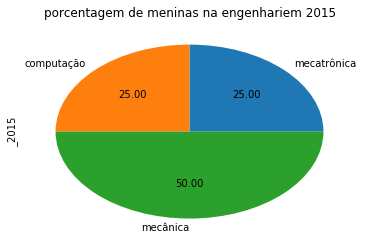

In [30]:
pie2015 = minas_idx["_2015"]
pie2015.plot(kind="pie", autopct="%.2f", legend=False);
plt.title("porcentagem de meninas na engenhariem 2015");

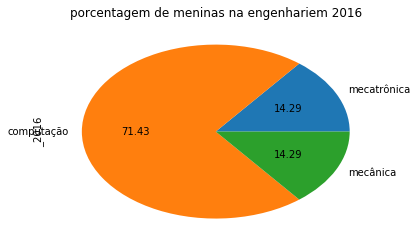

In [31]:
pie2016 = minas_idx["_2016"]
pie2016.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2016");

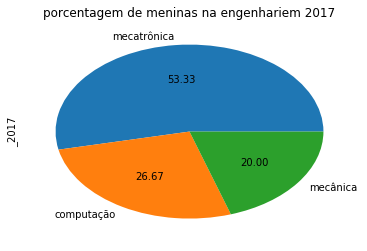

In [32]:
pie2017 = minas_idx["_2017"]
pie2017.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2017");

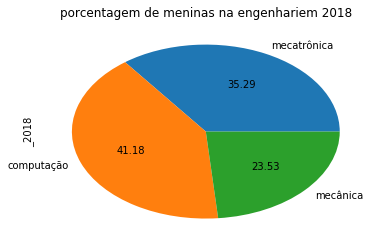

In [33]:
pie2018 = minas_idx["_2018"]
pie2018.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem de meninas na engenhariem 2018");

Diante destes gráficos, foi possível observar o quanto variou a escolha do curso entre as meninas: sendo inicialmente a escolha favorita sendo mecânica. Mas ao longo dos anos, o curso mecânica foi dimibuindo enquanto o curso de computação e mecatrônica equilibrando entre si.

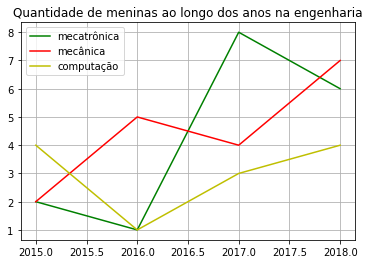

In [34]:
anos = [2015, 2016, 2017, 2018]
mecat = [2, 1, 8, 6]
comp = [2, 5, 4, 7]
mec = [4,1,3,4]

plt.plot(anos, mecat,"g", label="mecatrônica");
plt.plot(anos, comp, "r", label="mecânica");
plt.plot(anos, mec, "y", label="computação");
plt.grid(True)
plt.title("Quantidade de meninas ao longo dos anos na engenharia")
plt.legend();

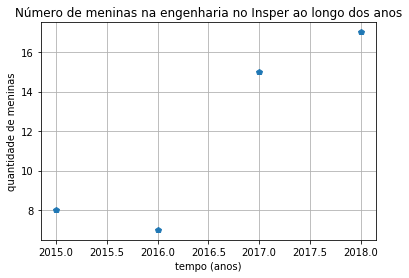

In [35]:
y = [8, 7, 15, 17]
x = [2015, 2016, 2017, 2018]
plt.plot(x, y, "p");
plt.ylabel("quantidade de meninas")
plt.grid(True)
plt.xlabel("tempo (anos)")
plt.title("Número de meninas na engenharia no Insper ao longo dos anos");

#### Primeiro vimos a distribuição da escolaridade de cada menina:

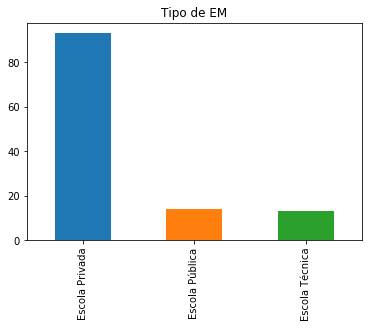

In [36]:
eng.TIPO_EM.value_counts().plot.bar()
plt.title("Tipo de EM");

#### Se existia algum familiar que estuda/estudou engenharia

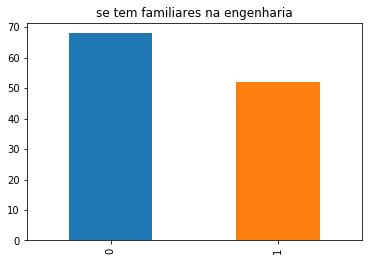

In [37]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia");

#### Se houvesse um familiar, quem que seria:

Text(0.5,1,'Familiares na Engenharia')

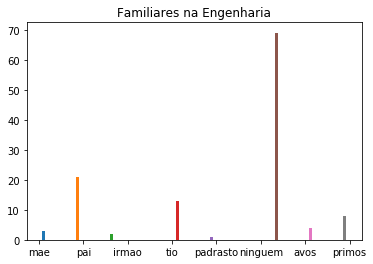

In [38]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);
plt.title('Familiares na Engenharia')

#### Analisamos também a variação de que engenharia cada uma fazia

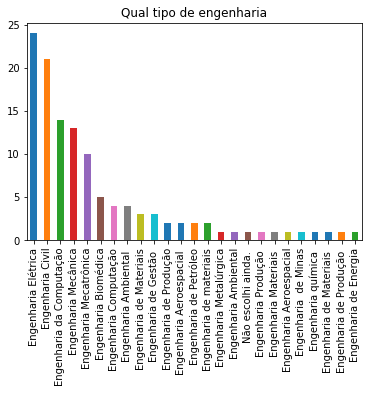

In [39]:
eng["TIPO_ENG"].value_counts().plot.bar()
plt.title("Qual tipo de engenharia");

#### Analisamos  de onde cada menina que faz engenharia veio

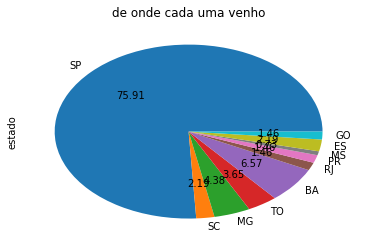

In [40]:
estados = tortas_es.idx["estado"]
estados.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("de onde cada uma venho");

A partir deste gráfico de torta vemos que a maioria das meninas são originalmente de São Paulo, com em segundo lugar Bahia.

## Análise das meninas do INSPER

#### Primeiramente vimos a distribuição do curso entre as meninas

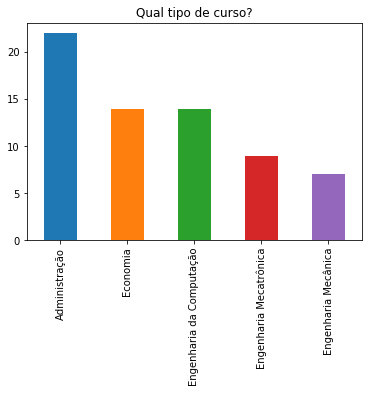

In [41]:
Insper['Curso'].value_counts().plot.bar()
plt.title("Qual tipo de curso?");

Ao ver a distribuição, vimos se havia algum familiar que fazia engenharia e se sim, quem?

Text(0.5,1,'porcentagem da familia em engenharia')

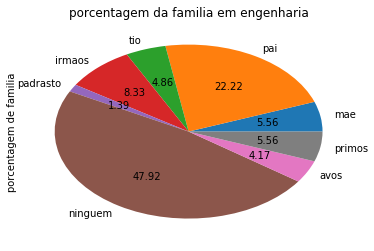

In [42]:
adim = pies_idx["porcentagem de familia"]
adim.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("porcentagem da familia em engenharia")

Vimos a partir deste gráfico de que a maioria das pessoas entrevistadas não tem um familiar que fez engenharia, mas logo em seguida deste número existe um número significante de quantas meninas tem um pai que se formou em engenharia

# O QUE FALTA

* FAZER NOSSA HIPOTESE

# Regressão Logística

In [43]:
# o sample foi utilizado para fazer um shuffle em nosso dataframe
Insper_mist= Insper.sample(66, replace=False)
Insper_mist.head(1)
Insper_mist.columns.tolist()

['Algum familiar na engenharia?',
 'Com quantos anos você espera se aposentar?',
 'Como descobriu o Insper?',
 'Curso',
 'ESTADO/CID',
 'Familiar na área?',
 'Faz Engenharia?',
 'IDADE',
 'Insper foi sua 1a opcao?',
 'NOME',
 'NOME_EM',
 'Por que Insper?',
 'Por que escolheu este curso?',
 'Quais familiares?',
 'Quanto você espera ganhar no seu início de sua carreira?',
 'SEMESTRE',
 'Se "Não", qual?',
 'Se SIM na pergunta anterior, quais Familiares?',
 'Seu curso foi sua 1a escolha?',
 'TIPO_EM',
 'Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?',
 'Ter poucas meninas no Insper te desmotiva a ingressar na instituição?',
 'Você pretende ter filhos?']

In [44]:
Insper_mist.shape

(66, 23)

In [45]:
teste = Insper_mist[:33]
treinamento = Insper_mist[33:]

In [46]:
X_train = (treinamento["Faz Engenharia?"]=="1")
X_test = (teste["Faz Engenharia?"]=="1")
y_train = (treinamento["Faz Engenharia?"]=="1")
y_test= (teste["Faz Engenharia?"]=="1")

In [47]:
#retirando colunas para realizar a análise

Insper_mist = Insper_mist.drop('Quais familiares?',1)
Insper_mist = Insper_mist.drop('Algum familiar na engenharia?',1)
Insper_mist=Insper_mist.drop('Se SIM na pergunta anterior, quais Familiares?',1)
Insper_mist = Insper_mist.drop('Como descobriu o Insper?',1)
Insper_mist = Insper_mist.drop('SEMESTRE',1)
Insper_mist = Insper_mist.drop('Por que Insper?',1)
Insper_mist = Insper_mist.drop('Se "Não", qual?',1)
Insper_mist = Insper_mist.drop('NOME',1)
Insper_mist = Insper_mist.drop('IDADE',1)
Insper_mist = Insper_mist.drop('Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?',1)
Insper_mist = Insper_mist.drop('Com quantos anos você espera se aposentar?',1)
Insper_mist = Insper_mist.drop('Quanto você espera ganhar no seu início de sua carreira?',1)
Insper_mist = Insper_mist.drop('ESTADO/CID',1)
Insper_mist = Insper_mist.drop('Curso',1)
Insper_mist = Insper_mist.drop("Ter poucas meninas no Insper te desmotiva a ingressar na instituição?",1)
Insper_mist = Insper_mist.drop('NOME_EM',1)
Insper_mist = Insper_mist.drop("Por que escolheu este curso?",1)


In [48]:
Insper_mist.shape

(66, 6)

In [49]:
def dummify(Insper_mist, column_name):
    df = Insper_mist.copy()
    
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(Insper_mist[column_name], prefix = column_name)], axis=1)
    return df2

In [50]:
novo = dummify(Insper_mist, "TIPO_EM")
novo = novo.astype(np.float64)
novo.dtypes

Familiar na área?                float64
Faz Engenharia?                  float64
Insper foi sua 1a opcao?         float64
Seu curso foi sua 1a escolha?    float64
Você pretende ter filhos?        float64
TIPO_EM_Escola Privada           float64
TIPO_EM_Escola Pública           float64
dtype: object

In [51]:
novo.head(1)

,Familiar na área?,Faz Engenharia?,Insper foi sua 1a opcao?,Seu curso foi sua 1a escolha?,Você pretende ter filhos?,TIPO_EM_Escola Privada,TIPO_EM_Escola Pública
28,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [52]:
teste = novo[:33]
treinamento= novo[33:]

In [53]:
X_train = (treinamento['Faz Engenharia?']==1)
X_test = (teste['Faz Engenharia?']==1)
y_train = (treinamento['Faz Engenharia?']==1)
y_teste = (teste['Faz Engenharia?']==1)

In [54]:
X = novo
X.drop('Faz Engenharia?', 1)
y = novo['Faz Engenharia?']
RANDOM_SEED = 42 # faz um random no DataFrame

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= RANDOM_SEED)

In [56]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 1.0


/anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
# Testa modelo.
y_pred = model.predict(X_test)

# Calcula acurácia.
acc = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

Acurácia: 1.0


In [58]:
#para verificar se o programa não está apenas colocando as variáveis como um 1 ou 0

pd.Series(y_pred).value_counts()

0.0    11
1.0    11
dtype: int64

In [59]:
n = 33

for original, binarized in zip(teste["Faz Engenharia?"][:n], y_train[:n]):
    print('{} -> {}'.format(original, binarized))

1.0 -> 0.0
0.0 -> 0.0
1.0 -> 0.0
1.0 -> 1.0
0.0 -> 1.0
1.0 -> 1.0
1.0 -> 0.0
0.0 -> 1.0
0.0 -> 1.0
0.0 -> 1.0
1.0 -> 0.0
0.0 -> 0.0
1.0 -> 1.0
0.0 -> 0.0
0.0 -> 0.0
0.0 -> 1.0
0.0 -> 0.0
0.0 -> 0.0
0.0 -> 1.0
1.0 -> 0.0
0.0 -> 1.0
0.0 -> 0.0
1.0 -> 1.0
0.0 -> 0.0
0.0 -> 0.0
0.0 -> 0.0
0.0 -> 1.0
1.0 -> 0.0
0.0 -> 1.0
0.0 -> 0.0
1.0 -> 1.0
1.0 -> 0.0
0.0 -> 0.0


In [60]:
teste_array = treinamento["Faz Engenharia?"].values.reshape(1, -1) 

In [61]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1, tol=None, random_state=RANDOM_SEED)  # Existe aleatoriedade dentro do SGDClassifier.
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
y_pred_mist = sgd_clf.predict(X_test)
print(y_pred_mist)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_mist)))

[1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
Accuracy: 1.0


A acurácia do programa é de 100%, isso ocorre devido ao fato do nosso banco de dados possuir apenas 66 dados. O motivo disto é que analisamos uma demografia pequena (apenas Alunos Insper) e ao restringirmos para apenas meninas. Para que nosso programa seja mais realista, é preciso buscar mais dados, por meio de obter mais respostas e fazer essa mesma análise para meninas na engenharia em outras faculdades, fazer uma análise mais

# Conclusão

Ao finalizar a Regressão Logística, pode-se concluir que nossa programação consegue prever, em alta precisão, se ao uma menina entrar no INSPER, diante de suas características vai fazer Engenharia ou não.

A previsão feita pelo modelo é altamente confiável, é possível notar isso ao olhar a acurácia, a qual é 1. Ou seja, o modelo tem uma previsão exata. Esse fato deve ocorrer pelo motivo de as bases de dados terem sido colhidas por nós mesmo, essa coleta foi realizada por meio do Google Forms, no qual criamos um formulário específico para o que queriamos.

# Bibliografia:

* pd.concat:
https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order

* como fazer um random no DataFrame:
https://pt.stackoverflow.com/questions/324588/fazer-um-random-de-um-dataset-com-pandas

* arrumar o unit8 para int64:
https://stackoverflow.com/questions/46689428/convert-np-array-of-type-float64-to-type-uint8-scaling-values

## Links Forms

* Meninas na Engenharia Insper:
    https://goo.gl/forms/oT9rrDztVLDoLcd63  
    
* Meninas em ADM/ECO no Insper:
    https://goo.gl/forms/ylgdPyDlJdwgJTtt1
    
* Meninas na Engenharia em outras faculdades:
    https://goo.gl/forms/suHBJ1MHP0FR1v6I3

## Avaliação 
* criação dos dataframes = Manuela e Beatriz
* organização do excel = Manuela
* colocando os dataframes do jupyter e juntando eles = Beatrz
* Análise exploratória = Beatriz e Manuela
* Observações da análise exploratória = Manuela
* regressão logística = majoriamente Beatriz e Manuela